In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import requests
import json

In [47]:
apikey = "b399f5a7a24bf7be63e60ce7c22d1cb6e294e92b"

In [48]:
url = 'https://api.census.gov/data/2013/acs1?get=NAME,B15003_017E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E&for=congressional%20district:*&key=' + apikey

In [49]:
educationdata = requests.get(url)
edudata = educationdata.json()
edudf =pd.DataFrame(edudata)
edudf.columns = edudf.iloc[0]

In [50]:
edudf.head()

,NAME,B15003_017E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,state,congressional district
0,NAME,B15003_017E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,state,congressional district
1,"Congressional District 1 (113th Congress), Ala...",126702,42633,72934,23595,5941,3795,01,01
2,"Congressional District 2 (113th Congress), Ala...",120918,36495,57610,27888,4791,3695,01,02
3,"Congressional District 3 (113th Congress), Ala...",122707,32578,55675,29049,5384,6147,01,03
4,"Congressional District 4 (113th Congress), Ala...",127289,42214,46061,20847,4374,3450,01,04


In [51]:
# edudf.set_index("NAME", inplace=True)
# edudf.loc("Congressional District 45 (113th Congress), California")

In [52]:
edudf2 = edudf.drop([0])

In [53]:
edudf2.head()

,NAME,B15003_017E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,state,congressional district
1,"Congressional District 1 (113th Congress), Ala...",126702,42633,72934,23595,5941,3795,01,01
2,"Congressional District 2 (113th Congress), Ala...",120918,36495,57610,27888,4791,3695,01,02
3,"Congressional District 3 (113th Congress), Ala...",122707,32578,55675,29049,5384,6147,01,03
4,"Congressional District 4 (113th Congress), Ala...",127289,42214,46061,20847,4374,3450,01,04
5,"Congressional District 5 (113th Congress), Ala...",103980,39078,90232,38772,5092,5863,01,05


In [55]:
edudf3 = edudf2[(edudf2['NAME'] == "Congressional District 45 (113th Congress), California")]
edudf3.head()


,NAME,B15003_017E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,state,congressional district
66,"Congressional District 45 (113th Congress), Ca...",66484,40930,154514,66920,22529,10454,06,45


In [56]:
eduf3 = edudf3.rename(columns={"B15003_021E":"Associates Degree", "B15003_017E":"High School Diploma", "B15003_022E":"Bachelor's", "B15003_023E":"Masters" , "B15003_024E":"Professional" , "B15003_025E":"Doctorate"})

In [58]:
eduf3.head()

,NAME,High School Diploma,Associates Degree,Bachelor's,Masters,Professional,Doctorate,state,congressional district
66,"Congressional District 45 (113th Congress), Ca...",66484,40930,154514,66920,22529,10454,06,45


In [80]:
# plt.figure()
# eduf3.iloc[0].plot(kind='bar');

edudf4 = eduf3.T
edudf4

,66
0,
NAME,"Congressional District 45 (113th Congress), Ca..."
High School Diploma,66484
Associates Degree,40930
Bachelor's,154514
Masters,66920
Professional,22529
Doctorate,10454
state,06
congressional district,45


In [67]:
edudf5 = edudf4.drop(["NAME"])

edudf5

,66
0,
High School Diploma,66484
Associates Degree,40930
Bachelor's,154514
Masters,66920
Professional,22529
Doctorate,10454
state,06
congressional district,45


In [68]:
edudf6 = edudf5.drop(["state"])
edudf6

,66
0,
High School Diploma,66484
Associates Degree,40930
Bachelor's,154514
Masters,66920
Professional,22529
Doctorate,10454
congressional district,45


In [94]:
edudf7 = edudf6.drop(["congressional district"])
edudf7 = edudf7.rename(columns={"66":"Data"})
edudf7
list(edudf7)
edudf7[66] = edudf7[66].astype(str).astype(int)
edudf7.dtypes

66    int32
dtype: object

In [95]:
edudf7.columns

Int64Index([66], dtype='int64')

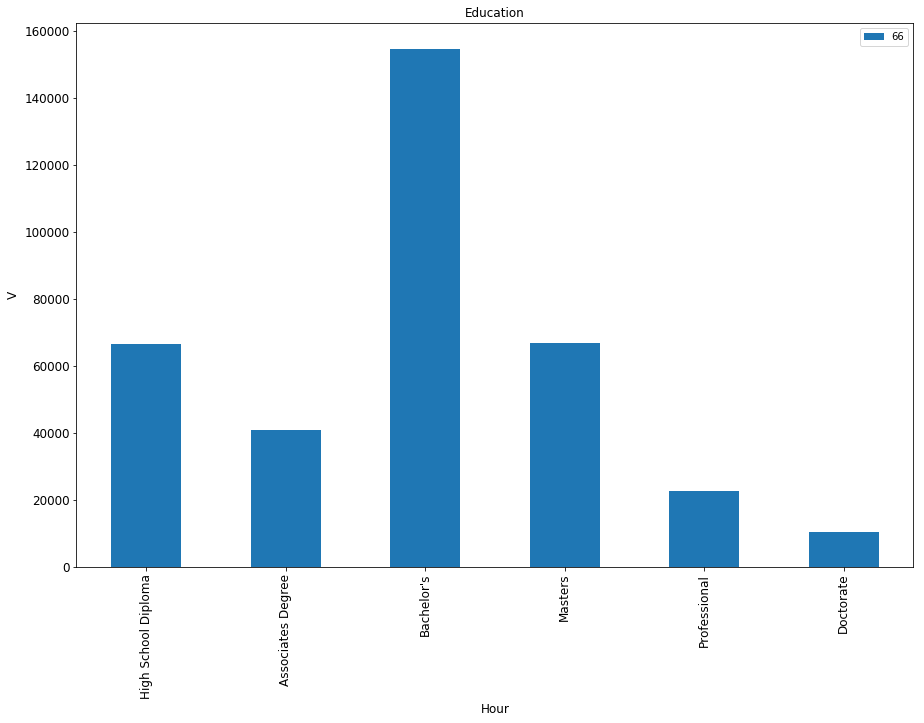

In [98]:
# x_axis = ["High School Diploma", "Associate's Degree","Bachedlor's Degree", "Master's Degree","Professional Degree","Doctorate Degree"]
# y_axis = 
# plt.bar(x_axis, bars_in_cities, color="b", align="edge")
# edudf7[[66] = pd.to_numeric(edudf7[[66])
# edudf7.head()

ax = edudf7[[66]].plot(kind='bar', title ="Education", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()